In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [2]:
sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

In [3]:
%run load_Results2.py

In [11]:
wt00 = np.where(gold0 == 1, 1/.064, 1)

In [38]:
# this is best so far,.default
wts01 = np.where(gold1 == 1, 1/.064, 1)
wts02 = np.where(gold2 == 1, 2/.064, 2)
wts03 = np.where(gold3 == 1, 3/.064, 3)
wts04 = np.where(gold4 == 1, 4/.064, 4)

In [13]:
wts01 = np.where(gold1 == 1,1/(np.mean(gold1)), 1/(1-mp1) )
wts02 = np.where(gold2 == 1,1/(np.mean(gold2)), 2/((1-mp2)) )
wts03 = np.where(gold3 == 1,1/(np.mean(gold3)), 3/((1-mp3)) )
wts04 = np.where(gold4 == 1,1/(np.mean(gold4)), 4/((1-mp4)))

In [39]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [40]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

In [41]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit + alpha[1])/ alpha[0]     
    proba = expit ( logi   ) #*tt.x[5]    
    return proba

In [42]:
alpha_0_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [43]:
pc = temp_pred2(alpha_0_1234, lo1234 )

(array([13556., 11285.,  9188.,  7186.,  5869.,  3710.,  2393.,  1240.,
          333.,    34.]),
 array([0.0132966 , 0.08393476, 0.15457293, 0.2252111 , 0.29584927,
        0.36648744, 0.43712561, 0.50776378, 0.57840194, 0.64904011,
        0.71967828]),
 <BarContainer object of 10 artists>)

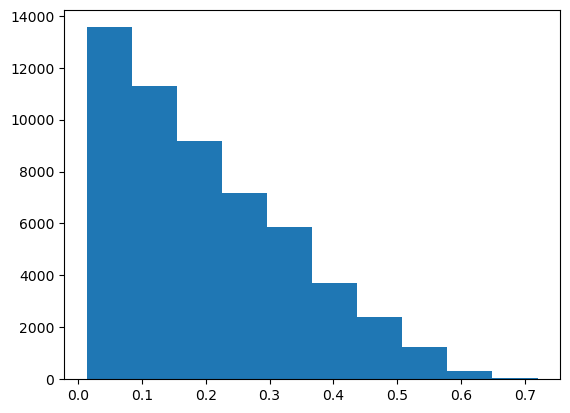

In [44]:
plt.hist(pc)

In [45]:
wts1 = np.where(gold1 == 1, 1/np.mean(gold1), 1/((1-pc) [ti==1]))
wts2 = np.where(gold2 == 1, 2/np.mean(gold2), 2/((1-pc) [ti==2]))
wts3 = np.where(gold3 == 1, 3/np.mean(gold3), 3/((1-pc) [ti==3]))
wts4 = np.where(gold4 == 1, 4/np.mean(gold4), 4/((1-pc) [ti==4]))

In [46]:
def weighted_temp2_scaling_i (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res

In [47]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  / t[5] 
        logi_2 = (l2 +  t[2])  / t[6] 
        logi_3 = (l3 +  t[3])  / t[7] 
        logi_4 = (l4 +  t[4])  / t[8] 
        
        p1  = expit (t[0] +  logi_1  )  
        p2  = expit ( t[0] +  logi_2  )  
        p3  = expit (t[0] +  logi_3  )  
        p4  = expit ( t[0] + logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1, .1  ] )    
    return  r

In [48]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [49]:
tt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5960481089035126
        x: [ 2.816e+00 -5.060e+00 -1.498e+00 -4.721e-01 -1.252e+00
             2.029e+00  1.149e+00  9.667e-01  1.288e+00]
      nit: 70
      jac: [ 5.662e-07 -5.960e-08 -3.576e-07  1.788e-07  8.047e-07
            -1.788e-07 -7.749e-07  2.980e-07  1.729e-06]
 hess_inv: [[ 1.755e+01  6.033e+00 ...  3.488e+00  1.438e+01]
            [ 6.033e+00  1.472e+03 ... -8.563e+00 -4.158e+01]
            ...
            [ 3.488e+00 -8.563e+00 ...  1.083e+01 -1.590e-01]
            [ 1.438e+01 -4.158e+01 ... -1.590e-01  1.914e+01]]
     nfev: 720
     njev: 72

In [50]:
def temp_pred  ( j1,j2, test_logit):    
    logi =  ( test_logit   + j1) / j2     
    proba = expit (  logi +tt.x[0]  )  
    return proba

In [51]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 600)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 600)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 300)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins = 300)



(array([ 388., 1324., 1435., 1704., 1936., 1864., 1462.,  969.,  515.,
          84.]),
 array([0.14253235, 0.20396571, 0.26539908, 0.32683244, 0.3882658 ,
        0.44969916, 0.51113253, 0.57256589, 0.63399925, 0.69543261,
        0.75686598]),
 <BarContainer object of 10 artists>)

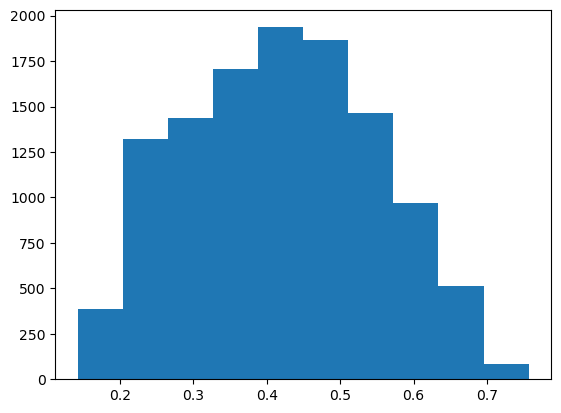

In [52]:
plt.hist(cal_4)

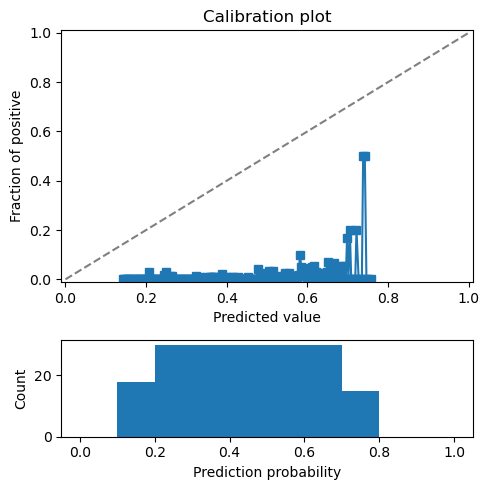

In [53]:
plotter(p4, y4)

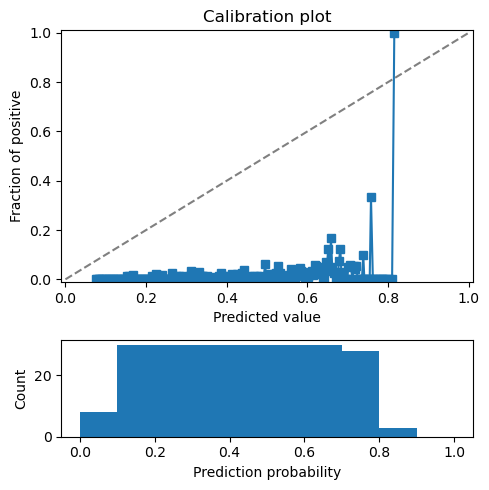

In [54]:
plotter(p3, y3)


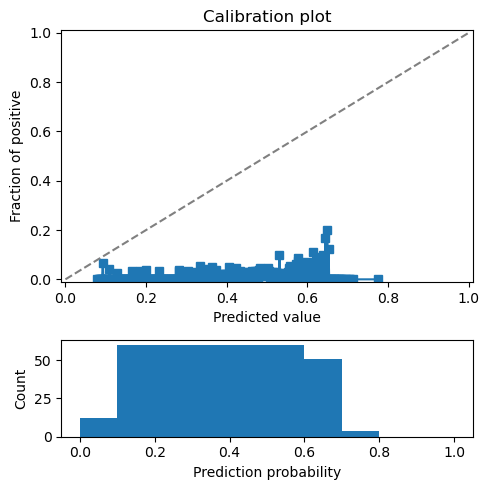

In [55]:
plotter(p2, y2)

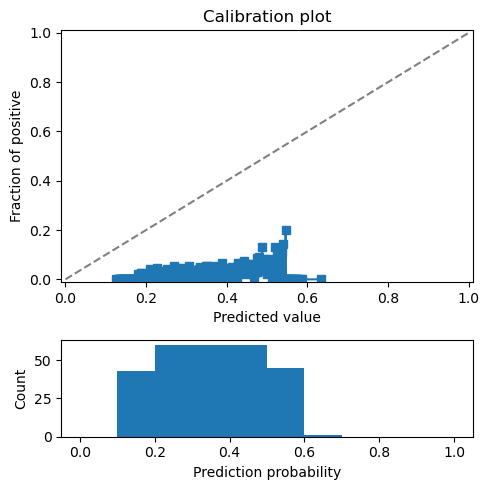

In [56]:
plotter(p1, y1)

In [57]:
temp4 = weighted_temp2_scaling_i(logit(mp4), gold4, wts4)

In [58]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit   + alpha[1] )/ alpha[0]      
    proba = expit ( logi  )              #*tt.x[5]    
    return proba

In [59]:
temp4

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.6519697515524217
        x: [ 1.288e+00  2.376e+00]
      nit: 19
      jac: [-7.674e-07 -5.014e-06]
 hess_inv: [[ 2.380e+01 -2.804e+00]
            [-2.804e+00  6.712e+00]]
     nfev: 66
     njev: 22

In [60]:
def temp_pred5  ( j1, test_logit):    
    logi =  ( test_logit   + j1)   
    proba = expit (  logi / tt.x[0]  )  
    return proba

In [61]:
import sklearn
from sklearn.metrics import confusion_matrix

In [62]:
[sklearn.metrics.roc_auc_score(tgold4,  tp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  tp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')]


[0.7381803724413891, 0.7153005937833217, 0.6771834798073553, 0.65750017303433]

In [63]:
( confusion_matrix (tgold1,  cal_1>.5) )

array([[15030,   622],
       [  448,    32]], dtype=int64)

In [64]:
( confusion_matrix (tgold2,  cal_2>.5) )

array([[9909, 4097],
       [ 111,  109]], dtype=int64)

In [65]:
( confusion_matrix (tgold3,  cal_3>.5) )

array([[8902, 3774],
       [  59,   94]], dtype=int64)

In [66]:
( confusion_matrix (tgold4,  cal_4>.5) )

array([[8274, 3306],
       [  34,   67]], dtype=int64)

In [67]:
( confusion_matrix (tgold1,  tp1>.5) )

array([[15649,     3],
       [  480,     0]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)